In [360]:
import numpy as np
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
import pywt
import scipy

# Create some random data to be tested for WaveCluster

In [2]:
#Generate random points
centers = [[1, 1], [-1, -1], [1, -1]]
X, y= make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

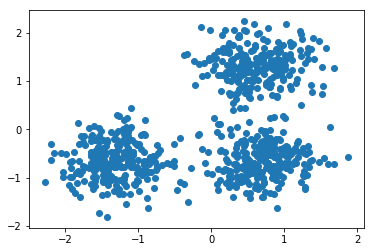

In [300]:
plt.scatter(X[:,0],X[:,1])

# Segment the space into cubes and bin the data

In [305]:
#Compute and/or set some variables
layers = 4
n_bins = 2**layers
d = X.shape[1] #number of dimensions

In [306]:
H = np.histogramdd(X, bins=n_bins)
data_quant = H[0]
data_quant

array([[ 0.,  0.,  1.,  2.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  2.,  3.,  6.,  4.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1.,  0.,  5.,  6., 12., 10.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1.,  3.,  6., 18., 19., 13.,  7.,  1.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  3.,  6.,  6., 18., 14.,  9.,  5.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1.,  1.,  1.,  9., 12.,  4.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
         2.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  1.,  2.,  2.,  0.,  1.,  0.,  0.,  3.,  6.,
         2.,  0.,  2.],
       [ 0.,  1.,  5., 10.,  4.,  3.,  3.,  3.,  1.,  2.,  3., 12.,  7.,
         9.,  3.,  1.],
       [ 0.,  3.,  6., 13., 15

In [307]:
data_quant.max()

21.0

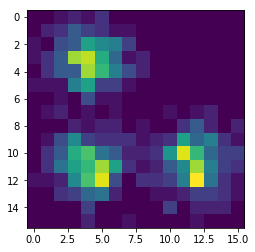

In [308]:
plt.imshow(data_quant)

# Compute the DWT

In [352]:
#Perform dwt on quantized data.  Here, we have lots of options fo rchoice of wavelet
wave = 'db1'
wp = pywt.wavedecn(data=data_quant, wavelet=wave)
#wp = pywt.dwtn(data=data_quant, wavelet=wave)

In [353]:
wp

[array([[46.875]]),
 {'ad': array([[14.75]]), 'da': array([[-14.75]]), 'dd': array([[15.375]])},
 {'ad': array([[-9.875,  0.25 ],
         [-9.5  , -5.125]]), 'da': array([[ 4.375, -0.5  ],
         [ 9.25 , 11.375]]), 'dd': array([[1.375, 0.25 ],
         [1.25 , 1.125]])},
 {'ad': array([[-10.  ,  10.5 ,   0.5 ,   0.  ],
         [ -4.75,   8.5 ,   0.25,   0.75],
         [-12.25,   8.5 , -13.25,  12.75],
         [ -4.25,  12.  ,  -3.25,   8.  ]]),
  'da': array([[ -6.5 , -15.5 ,  -0.5 ,   0.  ],
         [  5.75,  14.5 ,   0.25,  -0.75],
         [ -6.75, -15.  ,  -8.25,  -8.25],
         [  5.25,  12.5 ,   4.75,   9.5 ]]),
  'dd': array([[ 5.  , -6.  , -0.5 ,  0.  ],
         [-3.75,  6.  ,  0.75, -0.75],
         [ 4.25, -7.5 ,  6.25, -3.75],
         [-4.25,  9.5 , -1.25,  6.5 ]])},
 {'ad': array([[-1. , -2. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
         [-0.5, -6.5,  4. ,  5.5,  1. ,  0. ,  0. ,  0. ],
         [-1.5, -4. ,  6. ,  3.5,  1. ,  0. ,  0. ,  0. ],
         [-0.5, 

In [354]:
wp[0]

array([[46.875]])

# Threshold the results of DWT

In [355]:
#Pick a threshold value
epsilon = 2

In [356]:
#Threshold the DWT
if abs(wp[0])<epsilon:
    wp[0] = 0
else:
    wp[0] = 1

keys = ['ad', 'da', 'dd']
for i in range(1,layers+1):
    for k in keys:
        wp[i][k][abs(wp[i][k])<epsilon] = 0
        wp[i][k][abs(wp[i][k])>=epsilon] = 1

In [357]:
wp

[1,
 {'ad': array([[1.]]), 'da': array([[1.]]), 'dd': array([[1.]])},
 {'ad': array([[1., 0.],
         [1., 1.]]), 'da': array([[1., 0.],
         [1., 1.]]), 'dd': array([[0., 0.],
         [0., 0.]])},
 {'ad': array([[1., 1., 0., 0.],
         [1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]), 'da': array([[1., 1., 0., 0.],
         [1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]), 'dd': array([[1., 1., 0., 0.],
         [1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [1., 1., 0., 1.]])},
 {'ad': array([[0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 1., 1., 0., 0., 0., 0.],
         [0., 1., 1., 1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 1., 0., 0.],
         [1., 1., 0., 1., 0., 1., 1., 0.],
         [0., 1., 1., 1., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 0., 0.]]),
  'da': array([[0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 1., 1., 0., 0., 0., 0.],
      

# Find connected components

In [358]:
ex = wp[4]['dd']
ex

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.]])

In [363]:
scipy.sparse.csgraph.connected_components(ex, directed = False, connection = 'strong')

(2, array([0, 1, 1, 1, 1, 1, 1, 1], dtype=int32))

# Trash

In [231]:
#Create the bins
#bin_list = []
#for i in list(range(d)):
#    dim_min = math.floor(min(X[:,i]))
#    dim_max = math.ceil(max(X[:,i]))
#    dim_bin = np.linspace(start=dim_min, stop=dim_max, num=n_bins)
#    bin_list.append(dim_bin)
#    
#bin_list = np.stack(bin_list, axis=0)

In [232]:
#Quantize data into the bins
#data_quant = []
#index_key = []
#for b in list(range(d)):
#    inds = np.digitize(X[:,b], bin_list[b])
#    index_key.append(inds)
#    data_quant.append(np.bincount(inds, minlength = n_bins))
#
#index_key = np.stack(index_key,axis=0)
#data_quant = np.stack(data_quant, axis=0)